# 사례소개

## 2.1 usa.gov 데이터

In [5]:
경로 = 'data/pydata-book/usagov_bitly_data2012-03-16-1331923249.txt'

파일 열기

In [8]:
파일 = open(경로, encoding='utf8')
파일

<_io.TextIOWrapper name='data/pydata-book/usagov_bitly_data2012-03-16-1331923249.txt' mode='r' encoding='utf8'>

In [10]:
파일.readline()

'{ "a": "GoogleMaps\\/RochesterNY", "c": "US", "nk": 0, "tz": "America\\/Denver", "gr": "UT", "g": "mwszkS", "h": "mwszkS", "l": "bitly", "hh": "j.mp", "r": "http:\\/\\/www.AwareMap.com\\/", "u": "http:\\/\\/www.monroecounty.gov\\/etc\\/911\\/rss.php", "t": 1331923249, "hc": 1308262393, "cy": "Provo", "ll": [ 40.218102, -111.613297 ] }\n'

1. 각 줄을 JSON 형식으로 해독
1. 결과 객체를 리스트에 추가

In [11]:
import json

In [12]:
records = []
파일 = open(경로, encoding='utf8')
for line in 파일:
    records.append(json.loads(line))

In [13]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [14]:
records[0]['tz']

'America/New_York'

In [16]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [17]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

도수 집계 수행 함수 정의

In [18]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [19]:
counts = get_counts(time_zones)

In [20]:
counts['America/New_York']

1251

In [22]:
import pandas as pd

In [23]:
frame = pd.DataFrame(records)

In [24]:
len(frame)

3560

In [25]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [26]:
frame[:5]

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [27]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

도수 (frequency) 집계

In [29]:
tz_counts = frame['tz'].value_counts()

In [30]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

#### 연습

cy 열은 도시 정보를 담고 있습니다. 접속 사용자의 도시 도수 집계를 수행합니다.

In [31]:
frame['cy'].value_counts()

Provo              121
White Plains       104
Washington          98
Palo Alto           68
Shrewsbury          46
Acworth             38
Dallas              33
Paramus             32
Nogata              29
Los Angeles         28
Seattle             26
Philadelphia        26
Chicago             24
Alexandria          24
Mountain View       21
New York            21
Brooklyn            20
Honolulu            18
Westborough         18
Marietta            17
Louisville          17
Miami               17
Bellevue            16
Hallandale          16
London              16
Mililani            15
Elkton              15
Laurel              14
Saint Louis         14
Portland            14
                  ... 
Canby                1
Kent                 1
ebro                 1
Mesa                 1
Ballerup             1
Hartland             1
San Marcos           1
Blaichach            1
Ripoll               1
Thun                 1
Midvale              1
Torre Del Greco      1
Boxtel     

tz 정보 수집이 누락된 경우는 Missing으로 채우기

In [32]:
clean_tz = frame['tz'].fillna('Missing')

tz 정보 수집은 되었는데, 그 값이 빈 값인 경우는 Unknown으로 채우기

In [33]:
빈값 = clean_tz == ''
clean_tz[빈값] = 'Unknown'

In [35]:
tz_counts = clean_tz.value_counts()

In [36]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [37]:
%matplotlib inline

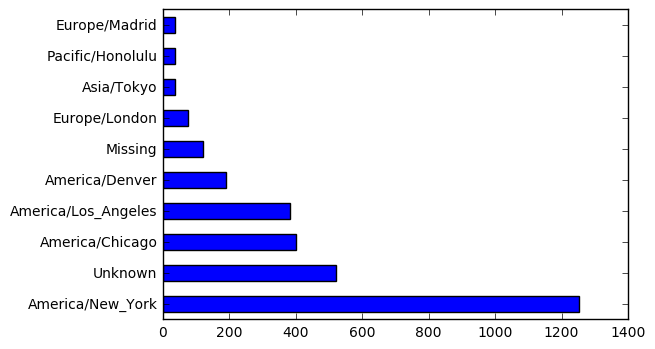

In [40]:
tz_counts[:10].plot(kind='barh')

운영체제와 브라우저 정보 분석

In [41]:
frame['a'][0]

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11'

브라우저 정보 추출

1. NaN 정보 제거: dropna()
1. 문자열을 공백을 기준으로 분절하기 : str.split()
1. 분절된 항목 중 첫 번째 것을 선택 : str[0]

In [48]:
'안녕하세요, 이성주입니다.'.split()

['안녕하세요,', '이성주입니다.']

In [49]:
frame['a'].dropna().str.split().str.get(0)

0                  Mozilla/5.0
1       GoogleMaps/RochesterNY
2                  Mozilla/4.0
3                  Mozilla/5.0
4                  Mozilla/5.0
5                  Mozilla/5.0
6                  Mozilla/5.0
7                  Mozilla/5.0
8                   Opera/9.80
9                  Mozilla/5.0
10                 Mozilla/5.0
11                 Mozilla/5.0
12                 Mozilla/5.0
14                 Mozilla/5.0
15                 Mozilla/5.0
16                 Mozilla/5.0
17                 Mozilla/5.0
18      GoogleMaps/RochesterNY
19                 Mozilla/5.0
20                 Mozilla/5.0
21                 Mozilla/5.0
22                 Mozilla/4.0
23                 Mozilla/5.0
24                 Mozilla/5.0
25                 Mozilla/5.0
26                 Mozilla/5.0
27                 Mozilla/5.0
28                 Mozilla/5.0
29                 Mozilla/5.0
30                 Mozilla/5.0
                 ...          
3529               Mozilla/5.0
3530    

In [42]:
browsers = frame['a'].dropna().str.split().str[0]

In [43]:
browsers[0]

'Mozilla/5.0'

In [50]:
browsers.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: a, dtype: int64

운영체제 정보 추출

In [55]:
cframe = frame[frame['a'].notnull()]

In [56]:
윈도우인가 = cframe['a'].str.contains('Windows')
윈도우인가[:10]

0     True
1    False
2     True
3    False
4     True
5     True
6     True
7     True
8    False
9     True
Name: a, dtype: bool

In [58]:
operating_system = 윈도우인가.replace(
    {True: 'Windows', False: 'Not Windows'})

표준시간대별 운영체제별 분류

In [59]:
by_tz_os = cframe.groupby(['tz', operating_system])

표준시간대별 운영체제별 분류별 개수 집계

In [63]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [64]:
agg_counts[:10]

a,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


합계 상위 10개 선택

In [72]:
top10 = agg_counts.sum(axis=1).sort_values(ascending=False)[:10]

In [76]:
count_subset = agg_counts.ix[top10.index]

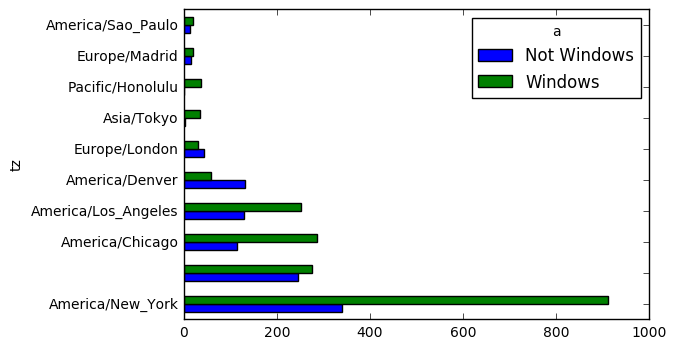

In [77]:
count_subset.plot(kind='barh')